<a href="https://colab.research.google.com/github/Ash4dev/expert-octo-garbanzo/blob/main/melody_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!git clone https://github.com/Ash4dev/expert-octo-garbanzo.git

Cloning into 'expert-octo-garbanzo'...
remote: Enumerating objects: 8521, done.
remote: Counting objects: 100% (8521/8521), done.
remote: Compressing objects: 100% (8327/8327), done.
remote: Total 8521 (delta 195), reused 8513 (delta 193), pack-reused 0
Receiving objects: 100% (8521/8521), 4.21 MiB | 10.26 MiB/s, done.
Resolving deltas: 100% (195/195), done.


In [1]:
# set-ups for the music21 library

# enables music21 to render images of musical notes
print('installing lilypond...')
!apt-get install lilypond > /dev/null

# converts midi files to wav files into order to play them
print('installing fluidsynth...')
!apt-get install fluidsynth > /dev/null
!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./font.sf2

print('done!')

!fluidsynth --version
!lilypond --version

installing lilypond...
Extracting templates from packages: 100%
installing fluidsynth...
done!
FluidSynth version 1.1.9
Copyright (C) 2000-2018 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of E-mu Systems, Inc.

FluidSynth 1.1.9
GNU LilyPond 2.18.2

Copyright (c) 1996--2012 by
  Han-Wen Nienhuys <hanwen@xs4all.nl>
  Jan Nieuwenhuizen <janneke@gnu.org>
  and others.

This program is free software.  It is covered by the GNU General Public
License and you are welcome to change it and/or distribute copies of it
under certain conditions.  Invoke as `lilypond --warranty' for more
information.



In [2]:
import music21
from IPython.display import Image, Audio

In [35]:
def show_score(music):
  display(Image(str(music.write('lily.png'))))

def play_score(music):
  filename = music.write('mid')
  !fluidsynth -ni font.sf2 $filename -F $filename\.wav -r 16000 > /dev/null
  display(Audio(filename + '.wav'))

In [ ]:
# proof of work
n = music21.note.Note('D#3')
n.duration.type = 'half'
show_score(n)
play_score(n)

littleMelody = music21.converter.parse('tinynotation: 3/4 c4 d8 f g16 a b f#')
show_score(littleMelody)
play_score(littleMelody)

bach = music21.corpus.parse('bach/bwv65.2.xml')
show_score(bach)
play_score(bach)

### Preprocessing steps

1. loading the data
2. rejecting the data that don't match our requirements
3. the ones that do, we want to transpose them to 2 keys: C_maj and A_min, so that the model can learn faster

In [64]:
import os
import music21

In [65]:
path_dir = '/content/expert-octo-garbanzo/essen/europa/deutschl'
# understanding os.walk
for dirpath, dirnames, filenames in os.walk(path_dir):
    print(dirpath, dirnames, filenames)

/content/expert-octo-garbanzo/essen/europa/deutschl ['fink', 'variant', 'kinder', 'erk', 'boehme', 'test', 'allerkbd', 'altdeu2', 'zuccal', 'dva', 'ballad', 'altdeu1'] ['CKSUM']
/content/expert-octo-garbanzo/essen/europa/deutschl/fink [] ['deut119.krn', 'deut087.krn', 'deut437.krn', 'deut191.krn', 'deut308.krn', 'deut542.krn', 'deut013.krn', 'deut014.krn', 'deut429.krn', 'deut095.krn', 'deut402.krn', 'deut461.krn', 'deut102.krn', 'deut348.krn', 'deut405.krn', 'deut264.krn', 'deut001.krn', 'deut019.krn', 'deut351.krn', 'deut029.krn', 'deut366.krn', 'deut086.krn', 'deut230.krn', 'deut189.krn', 'deut039.krn', 'deut262.krn', 'deut041.krn', 'deut133.krn', 'deut293.krn', 'deut531.krn', 'deut331.krn', 'deut342.krn', 'deut380.krn', 'deut100.krn', 'deut130.krn', 'deut146.krn', 'deut141.krn', 'deut211.krn', 'deut519.krn', 'deut529.krn', 'deut512.krn', 'deut162.krn', 'deut548.krn', 'deut557.krn', 'deut292.krn', 'deut283.krn', 'deut092.krn', 'deut499.krn', 'deut223.krn', 'deut487.krn', 'deut460.kr

In [37]:
# PATH_DIR = '/content/expert-octo-garbanzo/essen/europa/deutschl/test'

# # making multiple files load up successively

# def load_kern_files(path_dir):
#   songs = [] # store all the parsed score objects here

#   for dirpath, dirnames, filenames in os.walk(path_dir):
#     for file in filenames:
#       if file[-4:] == '.krn': # we only keep the kern data files
#         score = music21.converter.parse(os.path.join(dirpath, file)) # generates the score of the song
#         songs.append(score)
  
#   return songs

# songs = load_kern_files(PATH_DIR)

In [ ]:
# PATH_DIR = '/content/expert-octo-garbanzo/essen/europa/deutschl'

# # making multiple files load up successively

# def load_kern_files(path_dir):
#   songs = [] # store all the parsed score objects here

#   for dirpath, dirnames, filenames in os.walk(path_dir):

#     for file in filenames:
#       if file[-4:] == '.krn': # we only keep the kern data files
#         score = music21.converter.parse(os.path.join(dirpath, file)) # generates the score of the song
#         songs.append(score)
  
#     if len(dirnames) != 0: # helps us to generate scores of the files present in the directory
#       for dir in dirnames:
#         load_kern_files(os.path.join(dirpath, dir))

#   return songs

# songs = load_kern_files(PATH_DIR)

In [66]:
PATH_DIR = '/content/expert-octo-garbanzo/essen/europa/deutschl'

# making multiple files load up successively

def load_kern_files(path_dir):
  
  songs = [] # store all the parsed score objects here
  loaded = 0
  count = 0
  work = True

  if work:
    for dirpath, dirnames, filenames in os.walk(path_dir):
      for file in filenames:
        if file[-4:] == '.krn': # we only keep the kern data files
          count += 1
          try:
            score = music21.converter.parse(os.path.join(dirpath, file)) # generates the score of the song
            loaded += 1
          except:
            print(f"couldn't generate score for {file} in {dirpath}")

          songs.append(score)
    
      if len(dirnames) != 0: # helps us to generate scores of the files present in the directory
        for dir in dirnames:
          load_kern_files(os.path.join(dirpath, dir))
      
      work = False
    
  if work == 'False':
    print(f'% fraction of scores that could be generated: {loaded / count}')

  return songs

songs = load_kern_files(PATH_DIR)

In [67]:
len(songs)

5365

In [ ]:
PATH_DIR = '/content/expert-octo-garbanzo/essen/europa/deutschl'

# making multiple files load up successively

def load_kern_files(path_dir):
  songs = [] # store all the parsed score objects here
  loaded = 0
  count = 0

  for dirpath, dirnames, filenames in os.walk(path_dir):
    for file in filenames:
      if file[-4:] == '.krn': # we only keep the kern data files
        count += 1
        try:
          score = music21.converter.parse(os.path.join(dirpath, file)) # generates the score of the song
          loaded += 1
        except:
          print(f"couldn't generate score for {file} in {dirpath}")

        songs.append(score)
  
    if len(dirnames) != 0: # helps us to generate scores of the files present in the directory
      for dir in dirnames:
        load_kern_files(os.path.join(dirpath, dir))

    print(f'% fraction of scores that could be generated: {loaded / count}')
  return songs

songs = load_kern_files(PATH_DIR)

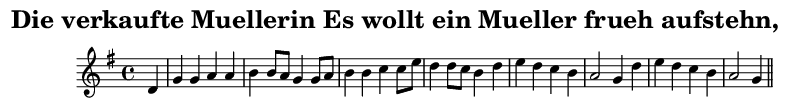

In [71]:
# proper way to test working: unit-testing
show_score(songs[4563])
play_score(songs[4563])

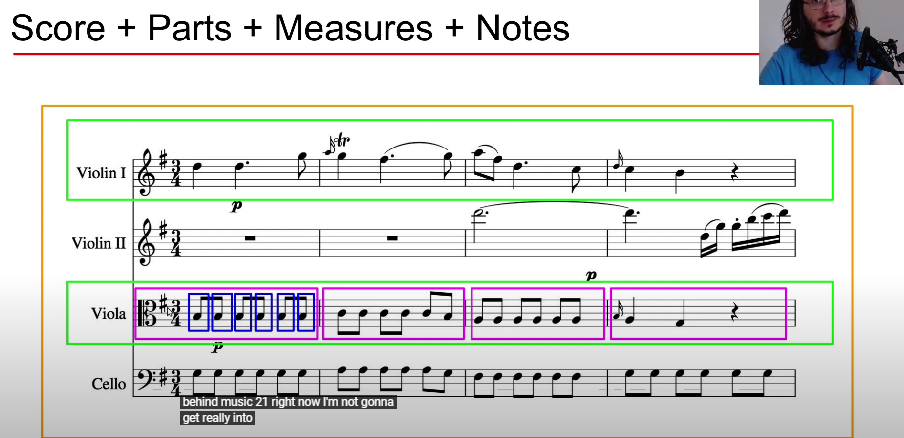